In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

# Linear Regression using numpy

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.01889985],
       [2.92409487]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.01889985],
       [9.86708959]])

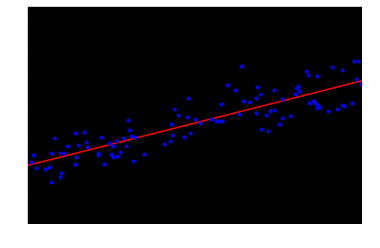

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01889985]), array([[2.92409487]]))

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01889985],
       [2.92409487]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.01889985],
       [2.92409487]])

# Batch Gradient Descent

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[4.01889985]
 [2.92409487]]


# Stochastic Gradient Descent (Numpy)

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyper-parameters

In [13]:
def learning_schedule(t):
    return t0 / (t + t1)

In [14]:
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.05397744]
 [2.90879871]]


# Stochastic Gradient Descent (Scikit-Learn)

In [15]:
from sklearn.linear_model import SGDRegressor

In [16]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04037835]), array([2.96590755]))

# Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set or based on just one instance,
Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware
optimization of matrix operations.

e.g. GPU, ASIC or Google TPU

PS: Called "batch size" in TensorFlow

|Algorithm      |Large m|Out-of-core support|Large n|Hyperparams|Scaling required|Scikit-Learn    |
|---------------|-------|-------------------|-------|-----------|----------------|----------------|
|Normal Equation|Fast   |No                 |Slow   |0          |No              |N/A             |
|SVD            |Fast   |No                 |Slow   |0          |No              |LinearRegression|
|Batch GD       |Slow   |No                 |Fast   |2          |Yes             |SGDRegressor    |
|Stochastic GD  |Fast   |Yes                |Fast   |>=2        |Yes             |SGDRegressor    |
|Mini-batch GD  |Fast   |Yes                |Fast   |>=2        |Yes             |SGDRegressor    |

# Polynomial Regression

for more complex data, which regression line is not a straight line.

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0] is", X[0])
print("X_poly[0] is", X_poly[0])

X[0] is [1.6016149]
X_poly[0] is [1.6016149  2.56517028]


In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81790453]), array([[1.03270684, 0.50384053]]))

In [20]:
X_new = np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

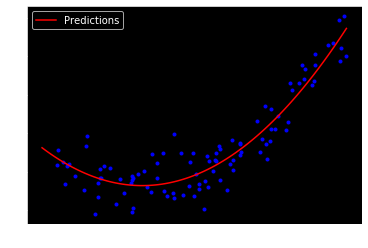

In [21]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.legend(loc="upper left")
plt.show()

# Learning Curves

If you perform high-degree Polynominal Regression, you will likely fit the training data much better than
with plain Linear Regression.

But high-degree Polynominal Regression model might severely overfitting the
training data, while linear model is underfitting training data.

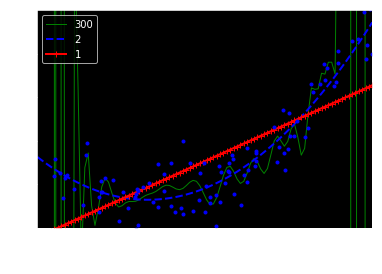

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

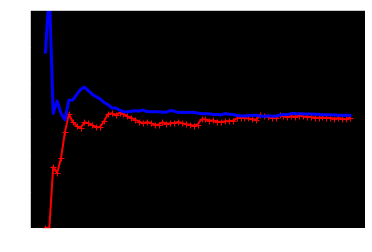

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors, = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plt.ylim(0, 3)
plot_learning_curves(lin_reg, X, y)
plt.show()

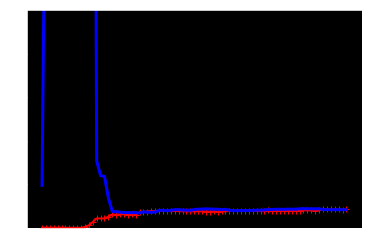

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plt.ylim(0, 10)
plot_learning_curves(polynomial_regression, X, y)
plt.show()

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])